# Predicting Smartphone Prices

## Data Preparation and Preliminary Exploration

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
smartphones = pd.read_csv('https://raw.githubusercontent.com/audreyafan/afan-db-final/refs/heads/main/smartphones.csv')

In [4]:
smartphones.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [5]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [6]:
# Descriptive statistics for prices
smartphones['Final Price'].describe()

,Final Price
count,1816.000000
mean,492.175573
std,398.606183
min,60.460000
25%,200.990000
50%,349.990000
75%,652.717500
max,2271.280000


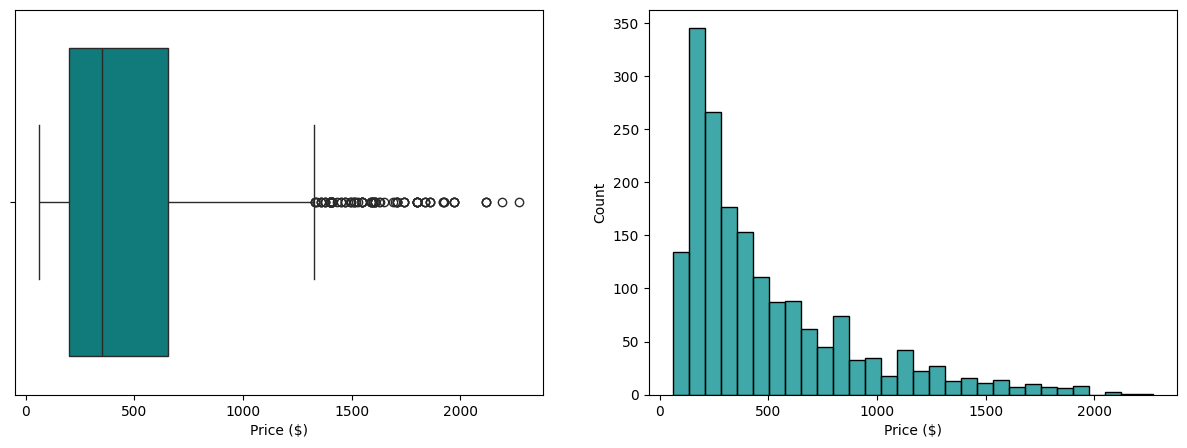

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Box plot of prices
sns.boxplot(data = smartphones, ax = ax[0], x = 'Final Price', color = 'darkcyan')
ax[0].set_xlabel('Price ($)')

# Distribution of prices
sns.histplot(data = smartphones, ax=ax[1], x = 'Final Price', color = 'darkcyan')
ax[1].set_xlabel('Price ($)')

plt.show()

In [8]:
# Group by smartphones by brand and sort from most expensive to least
brand_price = smartphones.groupby('Brand')['Final Price'].mean()
brand_price.sort_values(ascending = False)

,Final Price
Brand,
Apple,842.396815
Lenovo,757.180000
Asus,751.573333
Nothing,657.748889
Samsung,639.754367
Fairphone,634.190000
OnePlus,571.135909
LG,570.740000
Microsoft,552.390000


In [9]:
# The top 10 most expensive smartphones in this dataset
smartphones_sorted = smartphones.sort_values(by = "Final Price", ascending = False)
smartphones_sorted[['Brand', 'Final Price']].head(10)

,Brand,Final Price
1380,Honor,2271.28
1586,Samsung,2191.29
656,Apple,2119.00
789,Apple,2119.00
918,Apple,2119.00
538,Apple,1969.00
980,Apple,1969.00
795,Apple,1969.00
553,Apple,1969.00
983,Samsung,1922.93


Text(0, 0.5, 'Price ($)')

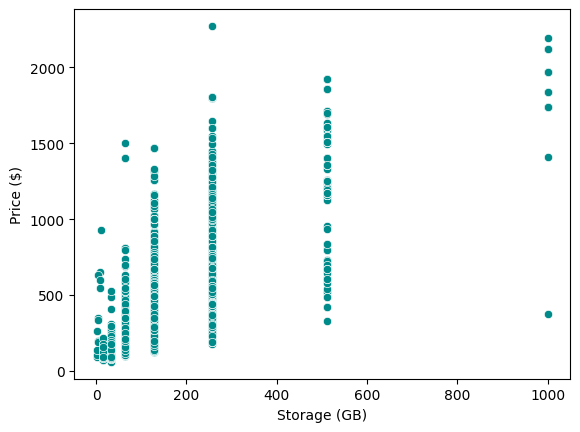

In [10]:
# Scatterplot of smartphone storage vs price
fig6 = sns.scatterplot(data = smartphones, x = 'Storage', y = 'Final Price', color = 'darkcyan')
fig6.set_xlabel('Storage (GB)')
fig6.set_ylabel('Price ($)')

In [11]:
smartphones.groupby('Storage')['Final Price'].mean()

,Final Price
Storage,
2.0,116.735000
3.0,187.840000
4.0,304.093333
8.0,601.670000
12.0,929.000000
16.0,119.374583
32.0,149.234759
64.0,262.798675
128.0,436.629098


Text(0, 0.5, 'Price ($)')

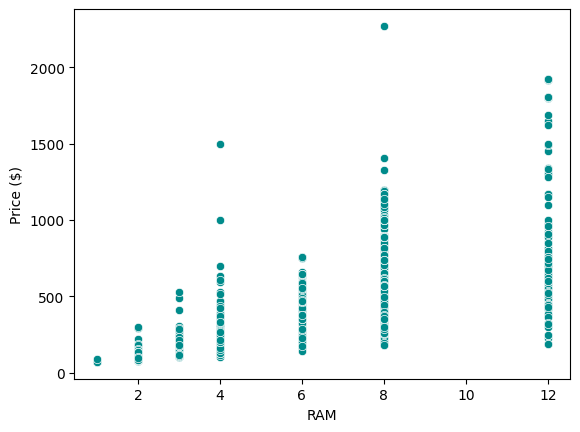

In [12]:
# Scatterplot of smartphone RAM vs price
fig7 = sns.scatterplot(data = smartphones, x = 'RAM', y = 'Final Price', color = 'darkcyan')
fig7.set_xlabel('RAM')
fig7.set_ylabel('Price ($)')

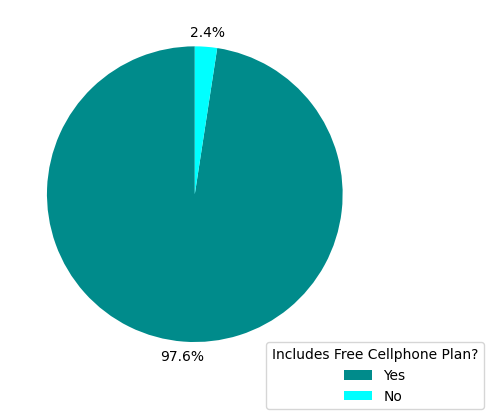

In [13]:
# Pie chart of free cellphone plans
free_counts = smartphones['Free'].value_counts()
free_counts.plot.pie(autopct='%1.1f%%', colors=['darkcyan', 'cyan'], labels = None, startangle = 90, pctdistance = 1.1)
plt.legend(labels = free_counts.index, title = "Includes Free Cellphone Plan?", loc = "lower right", bbox_to_anchor = (1.3, -0.1))
plt.ylabel('')
plt.show()

Text(11.809124999999996, 0.5, 'Count')

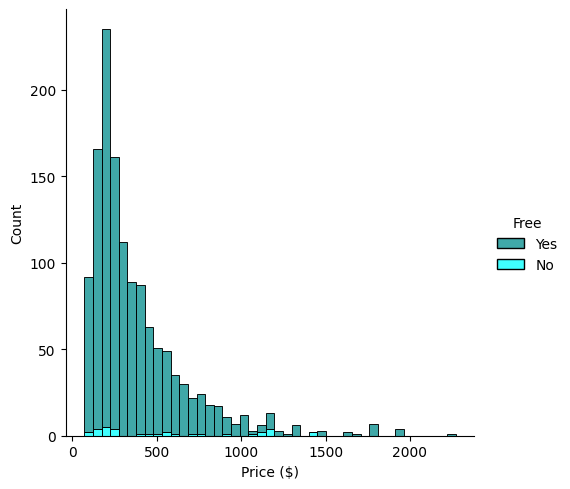

In [66]:
# Color palette
palette = {'Yes': 'darkcyan', 'No': 'cyan'}

# Histogram of prices split by free cellphone plan
sns.displot(data = smartphones, x = 'Final Price', hue = 'Free', multiple = 'stack', palette = palette)
plt.xlabel('Price ($)')
plt.ylabel('Count')

Text(15.932361111111108, 0.5, 'Count')

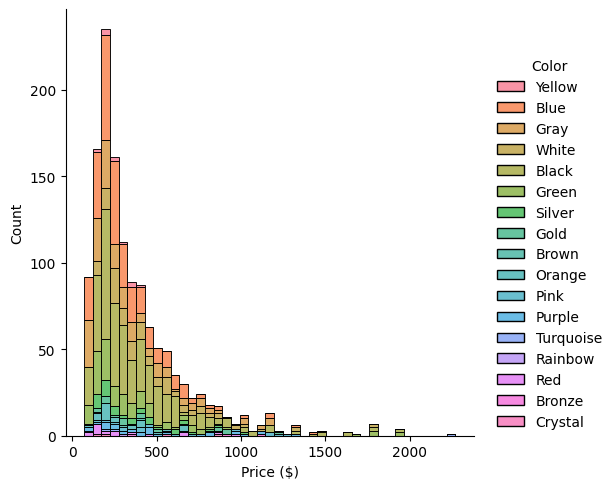

In [60]:
# Histogram of prices split by colors
sns.displot(data = smartphones, x = 'Final Price', hue = 'Color', multiple = 'stack', color = 'darkcyan')
plt.xlabel('Price ($)')
plt.ylabel('Count')

# Modeling and Intepretations

In [139]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Baseline Model

In [16]:
# Baseline model uses the mean smartphone price
y = smartphones['Final Price']
baseline = np.ones(y.shape) * y.mean()
baseline_mse = mean_squared_error(y, baseline)
print(baseline_mse)

158799.39601068525


## Multiple Linear Regression Model

In [17]:
# Drop null values
smartphones = smartphones.dropna()

In [67]:
# Create X & y, split into training and testing data
X = smartphones.drop(columns = ['Smartphone', 'Final Price', 'Color'])
y = smartphones['Final Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [68]:
# One hot encode categorical features
categorical_features = X_train.select_dtypes(include = 'object').columns
encoder = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'), categorical_features),
                                  remainder = StandardScaler())

In [69]:
# Create pipeline
pipe = Pipeline([('transform', encoder),
                 ('model', LinearRegression())])

In [70]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

In [71]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Brand', 'Model', 'Free'], dtype='object'))])),
                ('model', LinearRegression())])

In [72]:
# Coefficients
lr = pipe.named_steps['model']
coefficients = pd.DataFrame(
    lr.coef_,
    index = encoder.get_feature_names_out(),
    columns = ['coef']).sort_values('coef')
coefficients

,coef
onehotencoder__Model_Find X2 Neo,-683.390965
onehotencoder__Brand_Cubot,-663.950481
onehotencoder__Model_Reno2 Z,-510.856181
onehotencoder__Model_A96,-475.356090
onehotencoder__Model_Nord,-460.771411
...,...
onehotencoder__Model_Note 9,581.094775
onehotencoder__Model_King Kong 5,584.658038
onehotencoder__Model_Razr 2022,696.303324
onehotencoder__Model_Galaxy Z Fold4,1071.711973


In [74]:
# Create encoded X_train and X_test and transform into array
X_train_encoded = encoder.fit_transform(X_train).toarray()
X_test_encoded = encoder.transform(X_test).toarray()

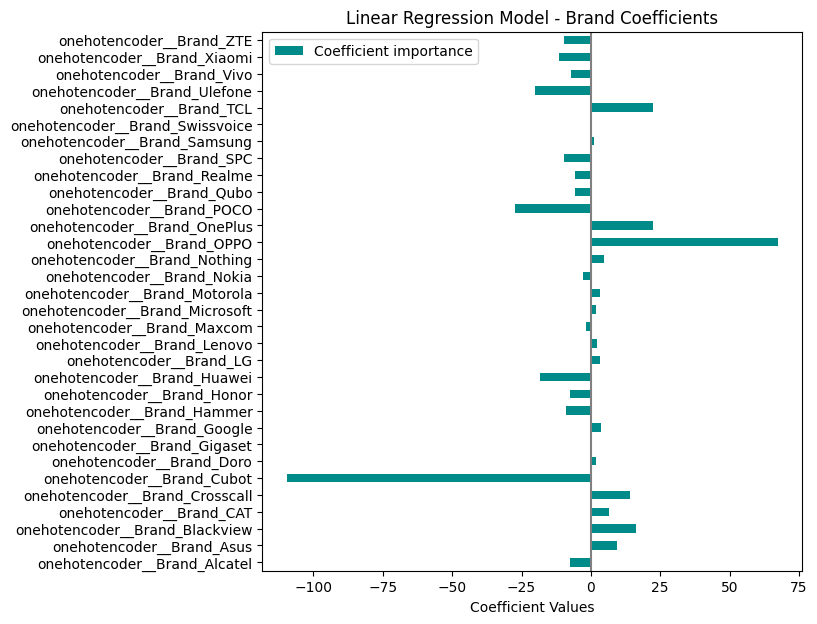

In [76]:
# Get all feature names to verify format of features under the 'brand' column
feature_names = np.array(encoder.get_feature_names_out(), dtype=str)

# Create a Boolean mask to select brand features
brand_mask = np.char.startswith(feature_names, "onehotencoder__Brand_")
brands_features = feature_names[brand_mask]

# Standard deviation for brand features
brands_std = X_train_encoded[:, brand_mask].std(axis=0)

# DataFrame for brand coefficient importance
coefs = pd.DataFrame(
    lr.coef_[brand_mask] * brands_std,
    columns=["Coefficient importance"],
    index=brands_features)

# Coefficients barplot
coefs.plot(kind="barh", figsize=(9, 7), color = 'darkcyan')
plt.xlabel("Coefficient Values")
plt.title("Linear Regression Model - Brand Coefficients")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.show()

In [77]:
# y-intercept
lr.intercept_

433.78281607320906

In [78]:
# MSE for train data
ytrain_preds = pipe.predict(X_train)
mean_squared_error(y_train, ytrain_preds)

9954.228730119192

In [79]:
# MSE for test data
ytest_preds = pipe.predict(X_test)
mean_squared_error(y_test, ytest_preds)

46855.46499753287

In [80]:
# Determine feature importance
perm_imp = permutation_importance(pipe, X_test, y_test, n_repeats = 15, random_state = 19)
feature_importance = pd.DataFrame(
    perm_imp['importances_mean'],
    index = X_train.columns.tolist(),
    columns = ["Feature Importance"])
feature_importance

,Feature Importance
Brand,0.251758
Model,0.854860
RAM,0.135918
Storage,0.025040
Free,0.006970


## Decision Tree Regression Model

In [123]:
# Create X & y, split into training and testing data
X = smartphones.drop(columns = ['Smartphone', 'Final Price', 'Color'])
y = smartphones['Final Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [124]:
# One hot encode categorical features
categorical_features = X_train.select_dtypes(include = 'object').columns
encoder = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'), categorical_features),
                                  remainder = StandardScaler())

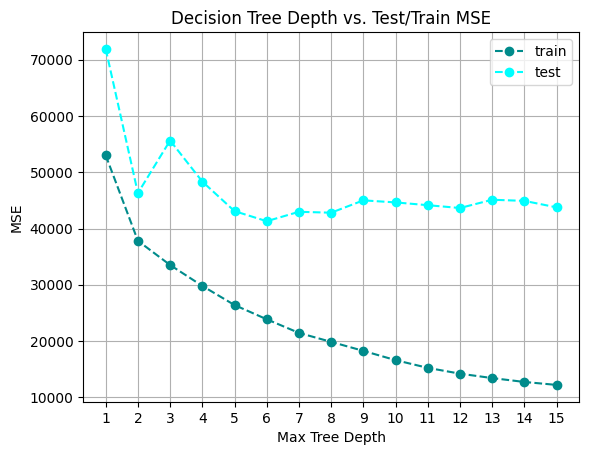

In [125]:
# The max depth with the lowest MSE for test data
train_scores = []
test_scores = []
for i in range(1, 16):
    dtree = DecisionTreeRegressor(max_depth = i).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 16), train_scores, '--o', color = 'darkcyan', label = 'train')
plt.plot(range(1, 16), test_scores, '--o', color = 'cyan', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 16))
plt.xlabel('Max Tree Depth')
plt.ylabel('MSE')
plt.title('Decision Tree Depth vs. Test/Train MSE');

In [126]:
# Create pipeline with Decision Tree Regression, using a max depth of 6 (lowest test MSE)
pipe2 = Pipeline([('transform', encoder),
                 ('model', DecisionTreeRegressor(max_depth = 6))])

In [127]:
pipe2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Brand', 'Model', 'Free'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=6))])

In [128]:
# MSE for train data
ytrain_preds = pipe2.predict(X_train)
mean_squared_error(y_train, ytrain_preds)

23584.412570548695

In [129]:
# MSE for test data
ytest_preds = pipe2.predict(X_test)
mean_squared_error(y_test, ytest_preds)

23462.569393083908

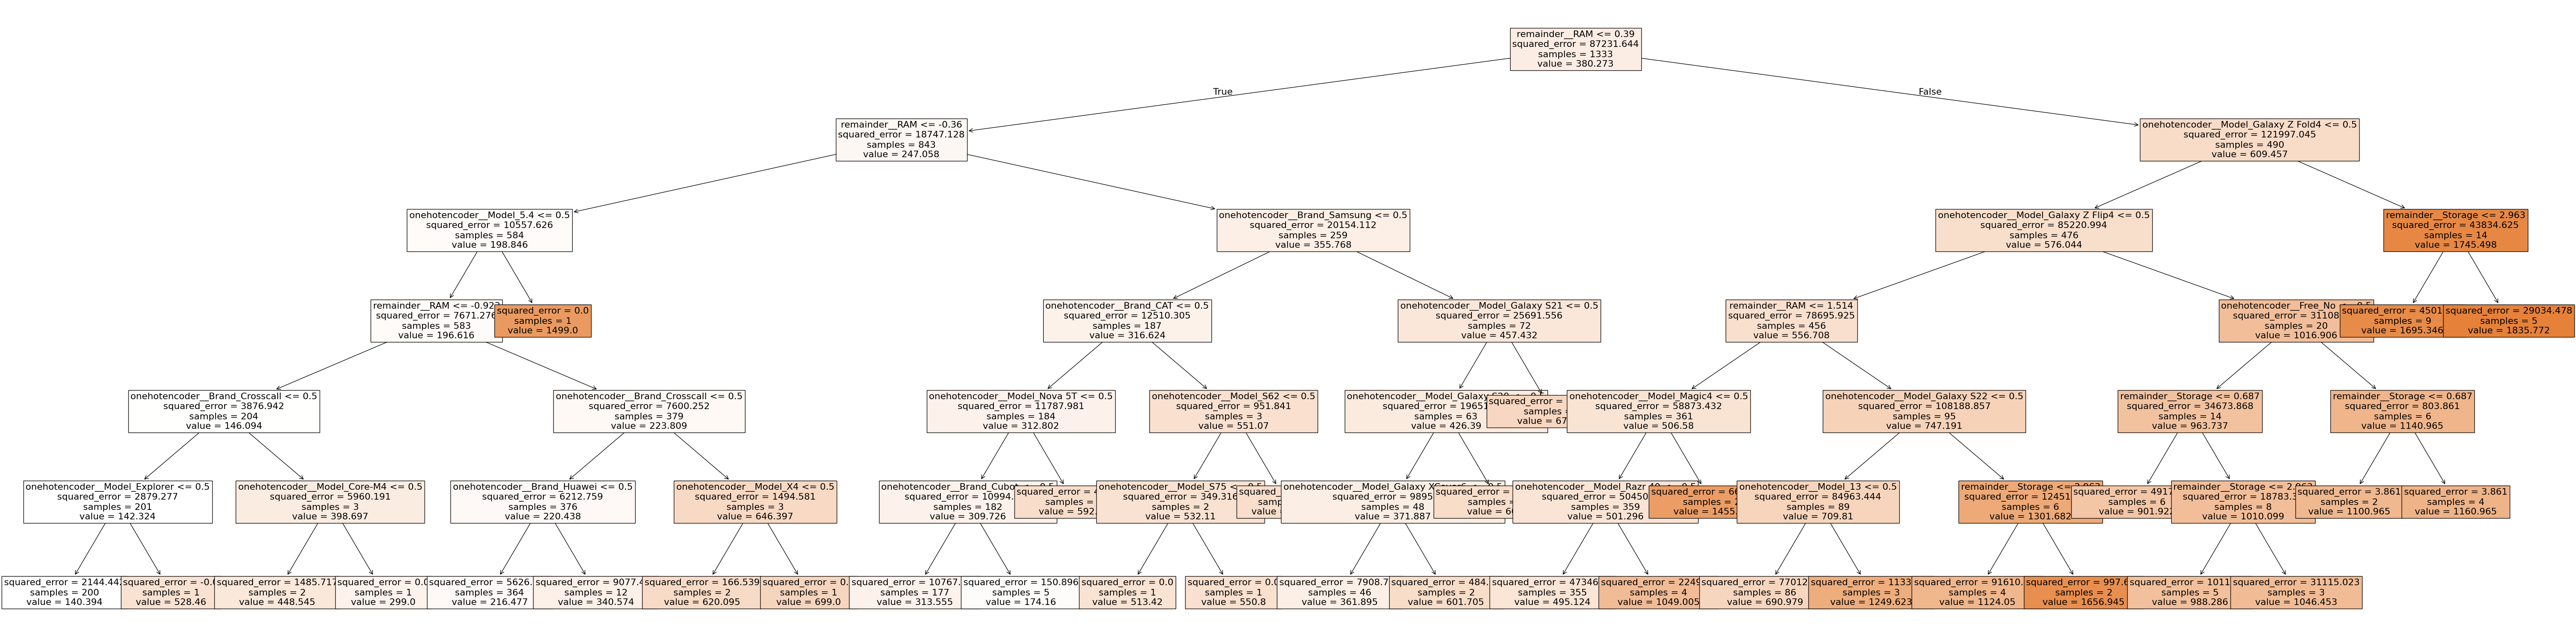

In [130]:
# Access decision tree regressor step from the pipeline
dtree = pipe2.named_steps['model']

# Plot the decision tree
plt.figure(figsize = (80, 20))
plot_tree(dtree, filled = True, feature_names = encoder.get_feature_names_out().tolist(), fontsize = 16)
plt.show()

In [131]:
# Determine feature importance
perm_imp = permutation_importance(pipe2, X_test, y_test, n_repeats = 15, random_state = 19)
feature_importance = pd.DataFrame(
    perm_imp['importances_mean'],
    index = X_train.columns.tolist(),
    columns = ["Feature Importance"])
feature_importance

,Feature Importance
Brand,0.025322
Model,0.464471
RAM,0.957142
Storage,0.013124
Free,0.002282


##Random Forest Regressor Model

In [132]:
# Create X & y, split into training and testing data
X = smartphones.drop(columns = ['Smartphone', 'Final Price', 'Color'])
y = smartphones['Final Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [133]:
# One hot encode categorical features
categorical_features = X_train.select_dtypes(include = 'object').columns
encoder = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'), categorical_features),
                                  remainder = StandardScaler())

In [135]:
# Create pipeline for random forest model
pipe3 = Pipeline([('encode', encoder), ('model', RandomForestRegressor())])

In [140]:
# Parameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [150]:
# Use grid-search with 5 cross validation folds
grid_search = GridSearchCV(pipe3, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Brand', 'Model', 'Free'], dtype='object'))])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [151]:
# Find the best parameters
grid_search.best_params_

{'model__max_depth': 10, 'model__n_estimators': 100}

In [154]:
# MSE for train data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

14578.298339827856

In [155]:
# MSE for test data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

31237.489065064536

In [156]:
# Determine feature importance
perm_imp = permutation_importance(forest, X_test, y_test, n_repeats = 15, random_state = 19)
feature_importance = pd.DataFrame(
    perm_imp['importances_mean'],
    index = X_train.columns.tolist(),
    columns = ["Feature Importance"])
feature_importance

,Feature Importance
Brand,0.028401
Model,0.365933
RAM,0.857015
Storage,0.011233
Free,-0.001290
